In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot

df = pd.read_csv("bitcoin_2017_to_2023.csv")
dataFull=df[['timestamp', 'open']]

                   timestamp      open
0        2017-08-17 04:00:00   4261.48
1        2017-08-17 04:01:00   4261.48
2        2017-08-17 04:02:00   4280.56
3        2017-08-17 04:03:00   4261.48
4        2017-08-17 04:04:00   4261.48
...                      ...       ...
3125995  2023-08-01 13:15:00  28896.00
3125996  2023-08-01 13:16:00  28907.41
3125997  2023-08-01 13:17:00  28908.52
3125998  2023-08-01 13:18:00  28902.48
3125999  2023-08-01 13:19:00  28902.48

[3126000 rows x 2 columns]
             open
0         4261.48
1         4261.48
2         4280.56
3         4261.48
4         4261.48
...           ...
3085675  31007.94
3085676  31004.52
3085677  30999.55
3085678  31031.65
3085679  31025.76

[3085680 rows x 1 columns]


<Axes: >

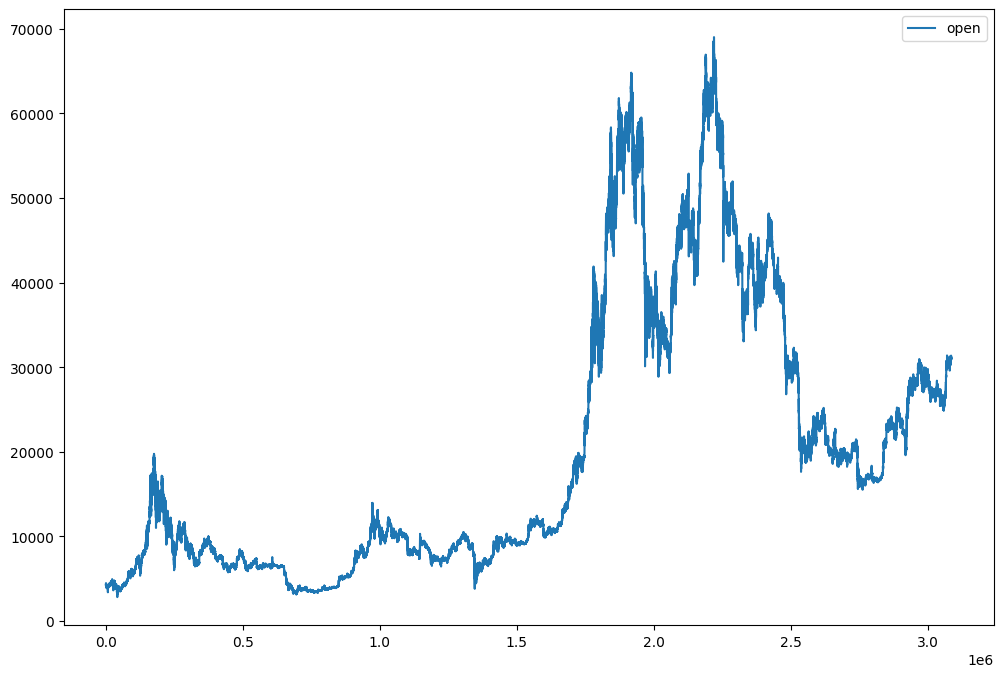

In [ ]:
# reverse index
dataFull_new = dataFull.iloc[::-1]
dataFull_new = dataFull_new.sort_values("timestamp", ignore_index=True)
print(dataFull_new)


num_x = len(dataFull_new["timestamp"])
xRange = range(num_x)

del dataFull_new["timestamp"]

##直近28日分を除いたデータをモデルフィットに使用
dta = dataFull_new[:len(dataFull)-60*24*28]
print(dta)
dta.plot(figsize=(12, 8))

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dataFull_new.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dataFull_new, lags=40, ax=ax2)